# **Machine Learning - Assignment 6**

*These lab assignments are new in the Machine and Deep Learning course. We'd like to hear what you think!*

*Please post any feedback you have on Brightspace. Thanks!*


---

## Introduction - Evaluation in Machine Learning

In this assignment, you will learn about common evaluation techniques in machine learning. This includes evaluating the error of the classifier, analyzing the learning curves, and performing cross-validation.

**Prerequisites:**
* Basic working knowledge of multivariate statistics and linear algebra
* Basic knowledge of Python and Numpy. Recommended tutorial for Python and Numpy [here](https://cs231n.github.io/python-numpy-tutorial/).

**Learning objectives:**
* Can explain what sources of performance variability there are in machine learning
* Knowing what a learning curve is
* Can understand the difference between train and test error
* Can explain what cross-validation is and how it is used

**Exercises types:**
* **Pen \& Paper** - Some exercises will ask you to write down mathematical derivations, calculations, explanations, or simple plots and representations. You can perform these exercises on paper or using a LaTeX editor.
* **Coding** - Some exercises will ask you to write Python code.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

---

## 1 - Sources of Variation (**Coding**)

### **Exercise 1.1**

In this exercise we investigate the difference in behavior of the error on the training and the test set. Generate a large test set and study the variations in the classification error based on repeatedly generated training sets. Use one of the artificial datasets from the first week's assignment.

In [3]:
from sklearn.linear_model import LogisticRegression

X_test, y_test = datasets.make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
clf = LogisticRegression()

for rnd_state in range(10):
    X_train, y_train = datasets.make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=rnd_state)
    # Train the classifier
    clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))


0.915
0.41
0.956
0.578
0.995
0.823
0.811
0.014
0.22
0.604


#### (a) What causes the variation in the error?

Now do the same for different test sets:

In [4]:
from sklearn.linear_model import LogisticRegression

X_train, y_train = datasets.make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
clf = LogisticRegression()

for rnd_state in range(10):
    X_test, y_test = datasets.make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=rnd_state)
    # Train the classifier
    clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))


0.826
0.563
0.779
0.638
0.995
0.843
0.815
0.003
0.041
0.727


#### (b) Again explain what causes the variance observed in the results.

---

## 2 - Learning Curves (**Coding**)

### **Exercise 2.1**

Using prtools lib, generate Highleyman classes (gendath) with a 1000 samples per class. Enlarge the feature dimensionality of this set by adding 60 dimensions of class independent randomness, i.e., plain noise. After that, use the function pr.cleval to generate learning curves for nmc, ldc, and qdc using 64, 128, 256, and 512 objects in the training set (make sure that you repeat often enough. . . ). Note that cleval automatically plots the learning curves.

In [5]:
!pip install git+https://github.com/DMJTax/prtools.git
import prtools as pr

  Cloning https://github.com/DMJTax/prtools.git to /private/var/folders/cw/wfhgm4yx3nx10jp950rn2m8w0000gn/T/pip-req-build-c4ag6wqm
  Running command git clone --filter=blob:none --quiet https://github.com/DMJTax/prtools.git /private/var/folders/cw/wfhgm4yx3nx10jp950rn2m8w0000gn/T/pip-req-build-c4ag6wqm
  Resolved https://github.com/DMJTax/prtools.git to commit 75d154313ba6a659b0ccd812eb2533929c043927
  Preparing metadata (setup.py) ... done


(array([[0.24899356, 0.25035225, 0.25020129],
        [0.24848055, 0.24199757, 0.25278566],
        [0.24979475, 0.24645936, 0.25087233],
        [0.24920953, 0.25      , 0.2500527 ],
        [0.24972148, 0.24966578, 0.24977718],
        [0.24855382, 0.24685614, 0.2494341 ]]),
 array([[0.2890625 , 0.28125   , 0.3203125 ],
        [0.33203125, 0.26953125, 0.29296875],
        [0.29296875, 0.28515625, 0.3046875 ],
        [0.28222656, 0.26367188, 0.27832031],
        [0.26660156, 0.26123047, 0.26074219],
        [0.25854492, 0.2644043 , 0.25634766]]))

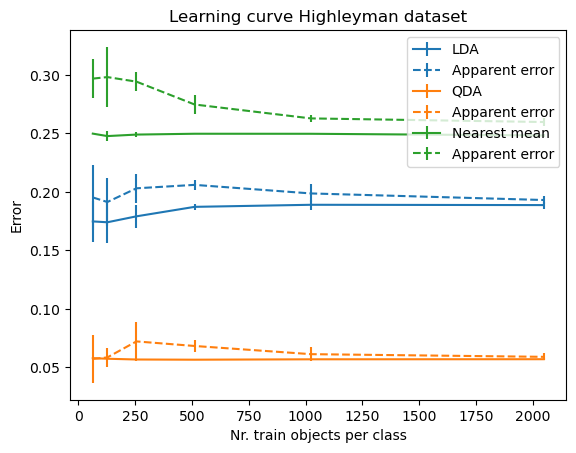

In [12]:
import prtools as pr
dataset = pr.gendath([10000, 10000])
noise = np.random.randn(20000, 600)
dataset.concatenate(noise, axis=1)

# Eval
pr.cleval(dataset, pr.ldc(), trainsize=[64, 128, 256, 512, 1024, 2048])
pr.cleval(dataset, pr.qdc(), trainsize=[64, 128, 256, 512, 1024, 2048])
pr.cleval(dataset, pr.nmc(), trainsize=[64, 128, 256, 512, 1024, 2048])

#### (a) Can you explain the overall behavior of these curves?

#### (b) Explain why the curves intersect. Which classifier performs best?

#### (c) What do you expect the limiting behavior of learning curves is? That is, if we were able to   train on more and more data?

---

## 3 - Cross-Validation (**Coding**)

### **Exercise 3.1**

Generate a small data set, say, with 10 objects per class.

In [15]:
X, y = datasets.make_classification(n_samples=30, n_features=2, n_classes=3, n_redundant=0, n_clusters_per_class=1, random_state=69)


#### (a) Using n-fold cross-validation,make plots for the error rates for kNN and 1NN over different values of n. Also calculate the standard deviation of the error estimate, e.g., by performing the cross-validation 10 times

2 - stdev=0.0
3 - stdev=2.7755575615628914e-17
4 - stdev=0.0
5 - stdev=0.0
6 - stdev=0.0
7 - stdev=0.0
8 - stdev=0.0
9 - stdev=2.7755575615628914e-17
2 - stdev=2.7755575615628914e-17
3 - stdev=0.0
4 - stdev=0.0
5 - stdev=0.0
6 - stdev=0.0
7 - stdev=0.0
8 - stdev=0.0
9 - stdev=0.0


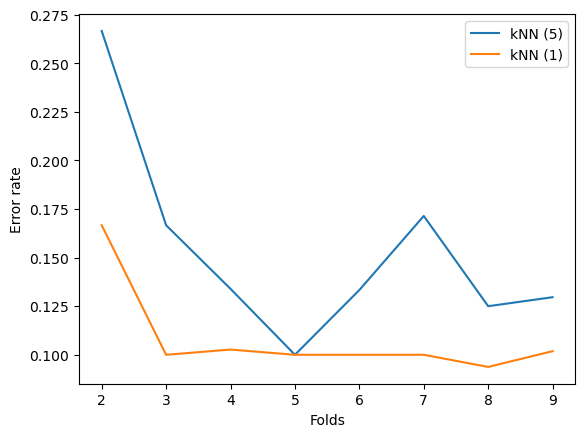

In [37]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier as KNNClf

fold_range = range(2, 10)

def calculate_fold_error_rates(clf):
    fold_error_rates = []

    # Fold into subsequent amount of partitions
    for folds in fold_range:
        skf = StratifiedKFold(folds, shuffle=True, random_state=69)
        error_rates = []

        # Repeat validation 10 times
        for _ in range(10):
            # Calculate the cross-validation score and save the error
            score = cross_val_score(clf, X, y, cv=skf, scoring='accuracy')
            error_rates.append(1 - np.mean(score))

        # Average over all validation runs
        fold_error_rates.append(np.mean(error_rates))
        print(f"{folds} - stdev={np.std(error_rates)}")

    return fold_error_rates

plt.xlabel("Folds")
plt.ylabel("Error rate")
plt.errorbar(fold_range, calculate_fold_error_rates(KNNClf()), label='kNN (5)')
plt.errorbar(fold_range, calculate_fold_error_rates(KNNClf(1)), label='kNN (1)')
plt.legend()
plt.show()
        

#### (b) What do you notice about the estimated error rates? What is the general trend (maybe you should redo the data generation and the cross-validation a couple of times).

#### (c) What happens to the variance of the estimates for varying n? Again, we are interested in the general trend.

#### (d) How would the observations change if one would repeat the experiments with much larger dataset? Would they change?